In [ ]:
!pip install tensorflow==2.0.0-alpha # for colab

In [8]:
# from https://www.tensorflow.org/tutorials/keras/basic_text_classification
# more on https://www.youtube.com/watch?v=BO4g2DRvL6U
import tensorflow as tf
print(tf.__version__)

from tensorflow.keras.datasets import imdb

max_features = 10000
maxlen = 400

print('Loading data...')
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=max_features)
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))
print(train_data[0])

2.0.0-alpha0
Loading data...


Training entries: 25000, labels: 25000
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [11]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

train_data = pad_sequences(train_data, value=word_index["<PAD>"],
                           padding='post', maxlen=256)

test_data = pad_sequences(test_data, value=word_index["<PAD>"],
                          padding='post', maxlen=256)

print(len(train_data[0]), len(train_data[1]))
decode_review(train_data[0])



"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [12]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, \
    Conv1D, GlobalMaxPooling1D, GlobalAveragePooling1D, Embedding
from tensorflow.nn import relu, sigmoid
from tensorflow.keras.backend import binary_crossentropy


# set parameters:
embedding_dims = 50
filters = 250
kernel_size = 3
hidden_dims = 250




# input shape is the vocabulary count used for the movie reviews (10,000 words)
vocab_size = 10000

model = Sequential()
model.add(Embedding(vocab_size, 16))
#model.add(Embedding(max_features, embedding_dims, input_length=maxlen))
#model.add(Dropout(0.2))
#model.add(Conv1D(filters, kernel_size, padding='valid', activation=relu, strides=1))
#model.add(GlobalMaxPooling1D())
model.add(GlobalAveragePooling1D())
#model.add(Dense(250, activation=relu))
#model.add(Dropout(0.2))
model.add(Dense(16, activation=relu))
model.add(Dense(1, activation=sigmoid))

model.summary()

model.compile(optimizer='adam',
              loss=binary_crossentropy,
              metrics=['acc']
              )


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [13]:
partial_validation_data = train_data[:10000]
partial_train_data = train_data[10000:]

partial_validation_labels = train_labels[:10000]
partial_train_labels = train_labels[10000:]

In [14]:
batch_size = 512 # 32
epochs=40 # 2

history = model.fit(partial_train_data,
                    partial_train_labels,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(partial_validation_data, partial_validation_labels),
                    verbose=1)
# history = model.fit(test_data, test_labels, batch_size=batch_size, epochs=epochs, verbose=1)
model.evaluate(test_data, test_labels)

Train on 15000 samples, validate on 10000 samples


Epoch 1/40
  512/15000 [>.............................] - ETA: 5s - loss: 0.6930 - acc: 0.5332

 2048/15000 [===>..........................] - ETA: 1s - loss: 0.6930 - acc: 0.5176

 3584/15000 [======>.......................] - ETA: 1s - loss: 0.6930 - acc: 0.5195

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.6928 - acc: 0.5275

 6656/15000 [============>.................] - ETA: 0s - loss: 0.6927 - acc: 0.5385

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.6926 - acc: 0.5462

 9216/15000 [=================>............] - ETA: 0s - loss: 0.6924 - acc: 0.5645

10752/15000 [====================>.........] - ETA: 0s - loss: 0.6922 - acc: 0.5820

12288/15000 [=======================>......] - ETA: 0s - loss: 0.6921 - acc: 0.5934

13824/15000 [==========================>...] - ETA: 0s - loss: 0.6918 - acc: 0.6060

15000/15000 [==============================] - 1s 67us/sample - loss: 0.6916 - acc: 0.6102 - val_loss: 0.6895 - val_acc: 0.6737


Epoch 2/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.6891 - acc: 0.6953

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.6887 - acc: 0.7021

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.6883 - acc: 0.7034

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.6881 - acc: 0.7029

 6656/15000 [============>.................] - ETA: 0s - loss: 0.6877 - acc: 0.7087

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.6873 - acc: 0.7133

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.6870 - acc: 0.7157

11264/15000 [=====================>........] - ETA: 0s - loss: 0.6867 - acc: 0.7163

12800/15000 [========================>.....] - ETA: 0s - loss: 0.6864 - acc: 0.7158

14336/15000 [===========================>..] - ETA: 0s - loss: 0.6859 - acc: 0.7208

15000/15000 [==============================] - 1s 49us/sample - loss: 0.6856 - acc: 0.7232 - val_loss: 0.6812 - val_acc: 0.7441


Epoch 3/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.6801 - acc: 0.7500

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.6794 - acc: 0.7495

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.6785 - acc: 0.7528

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.6779 - acc: 0.7521

 6656/15000 [============>.................] - ETA: 0s - loss: 0.6773 - acc: 0.7518

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.6766 - acc: 0.7517

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.6756 - acc: 0.7559

11264/15000 [=====================>........] - ETA: 0s - loss: 0.6750 - acc: 0.7543

12800/15000 [========================>.....] - ETA: 0s - loss: 0.6741 - acc: 0.7534

14336/15000 [===========================>..] - ETA: 0s - loss: 0.6729 - acc: 0.7574

15000/15000 [==============================] - 1s 48us/sample - loss: 0.6725 - acc: 0.7583 - val_loss: 0.6647 - val_acc: 0.7563


Epoch 4/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.6605 - acc: 0.7734

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.6608 - acc: 0.7832

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.6598 - acc: 0.7737

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.6583 - acc: 0.7650

 6656/15000 [============>.................] - ETA: 0s - loss: 0.6577 - acc: 0.7559

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.6562 - acc: 0.7598

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.6552 - acc: 0.7600

11264/15000 [=====================>........] - ETA: 0s - loss: 0.6537 - acc: 0.7625

12800/15000 [========================>.....] - ETA: 0s - loss: 0.6519 - acc: 0.7659

14336/15000 [===========================>..] - ETA: 0s - loss: 0.6502 - acc: 0.7686

15000/15000 [==============================] - 1s 48us/sample - loss: 0.6496 - acc: 0.7683 - val_loss: 0.6383 - val_acc: 0.7597


Epoch 5/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.6340 - acc: 0.7754

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.6308 - acc: 0.7808

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.6297 - acc: 0.7832

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.6285 - acc: 0.7875

 6656/15000 [============>.................] - ETA: 0s - loss: 0.6269 - acc: 0.7868

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.6253 - acc: 0.7887

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.6230 - acc: 0.7932

11264/15000 [=====================>........] - ETA: 0s - loss: 0.6210 - acc: 0.7935

12800/15000 [========================>.....] - ETA: 0s - loss: 0.6187 - acc: 0.7944

14336/15000 [===========================>..] - ETA: 0s - loss: 0.6167 - acc: 0.7953

15000/15000 [==============================] - 1s 48us/sample - loss: 0.6155 - acc: 0.7959 - val_loss: 0.6026 - val_acc: 0.7879


Epoch 6/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.5833 - acc: 0.8379

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.5885 - acc: 0.8159

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.5882 - acc: 0.8133

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.5867 - acc: 0.8102

 6656/15000 [============>.................] - ETA: 0s - loss: 0.5838 - acc: 0.8122

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.5827 - acc: 0.8099

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.5807 - acc: 0.8110

11264/15000 [=====================>........] - ETA: 0s - loss: 0.5781 - acc: 0.8139

12800/15000 [========================>.....] - ETA: 0s - loss: 0.5758 - acc: 0.8153

14336/15000 [===========================>..] - ETA: 0s - loss: 0.5738 - acc: 0.8158

15000/15000 [==============================] - 1s 48us/sample - loss: 0.5722 - acc: 0.8164 - val_loss: 0.5609 - val_acc: 0.8066


Epoch 7/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.5615 - acc: 0.8027

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.5410 - acc: 0.8413

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.5437 - acc: 0.8306

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.5396 - acc: 0.8313

 6656/15000 [============>.................] - ETA: 0s - loss: 0.5376 - acc: 0.8292

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.5361 - acc: 0.8289

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.5325 - acc: 0.8299

11264/15000 [=====================>........] - ETA: 0s - loss: 0.5293 - acc: 0.8309

12800/15000 [========================>.....] - ETA: 0s - loss: 0.5264 - acc: 0.8315

14336/15000 [===========================>..] - ETA: 0s - loss: 0.5247 - acc: 0.8306

15000/15000 [==============================] - 1s 48us/sample - loss: 0.5238 - acc: 0.8307 - val_loss: 0.5158 - val_acc: 0.8235


Epoch 8/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.4993 - acc: 0.8262

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.4892 - acc: 0.8413

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.4933 - acc: 0.8368

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.4906 - acc: 0.8418

 6656/15000 [============>.................] - ETA: 0s - loss: 0.4878 - acc: 0.8427

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.4853 - acc: 0.8447

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.4832 - acc: 0.8452

11264/15000 [=====================>........] - ETA: 0s - loss: 0.4811 - acc: 0.8465

12800/15000 [========================>.....] - ETA: 0s - loss: 0.4786 - acc: 0.8468

14336/15000 [===========================>..] - ETA: 0s - loss: 0.4771 - acc: 0.8481

15000/15000 [==============================] - 1s 48us/sample - loss: 0.4757 - acc: 0.8489 - val_loss: 0.4744 - val_acc: 0.8362


Epoch 9/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.4452 - acc: 0.8652

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.4466 - acc: 0.8574

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.4423 - acc: 0.8624

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.4415 - acc: 0.8619

 6656/15000 [============>.................] - ETA: 0s - loss: 0.4411 - acc: 0.8595

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.4387 - acc: 0.8597

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.4360 - acc: 0.8604

11264/15000 [=====================>........] - ETA: 0s - loss: 0.4352 - acc: 0.8593

12800/15000 [========================>.....] - ETA: 0s - loss: 0.4326 - acc: 0.8609

14336/15000 [===========================>..] - ETA: 0s - loss: 0.4318 - acc: 0.8615

15000/15000 [==============================] - 1s 48us/sample - loss: 0.4314 - acc: 0.8621 - val_loss: 0.4375 - val_acc: 0.8454


Epoch 10/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.4077 - acc: 0.8867

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.4019 - acc: 0.8755

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.4057 - acc: 0.8711

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.4045 - acc: 0.8719

 6656/15000 [============>.................] - ETA: 0s - loss: 0.4007 - acc: 0.8733

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.3992 - acc: 0.8719

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.3993 - acc: 0.8713

11264/15000 [=====================>........] - ETA: 0s - loss: 0.3975 - acc: 0.8730

12800/15000 [========================>.....] - ETA: 0s - loss: 0.3953 - acc: 0.8736

14336/15000 [===========================>..] - ETA: 0s - loss: 0.3938 - acc: 0.8743

15000/15000 [==============================] - 1s 48us/sample - loss: 0.3925 - acc: 0.8748 - val_loss: 0.4074 - val_acc: 0.8525


Epoch 11/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.3620 - acc: 0.8887

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.3712 - acc: 0.8760

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.3713 - acc: 0.8742

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.3685 - acc: 0.8793

 6656/15000 [============>.................] - ETA: 0s - loss: 0.3677 - acc: 0.8806

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.3680 - acc: 0.8792

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.3665 - acc: 0.8792

11264/15000 [=====================>........] - ETA: 0s - loss: 0.3644 - acc: 0.8804

12800/15000 [========================>.....] - ETA: 0s - loss: 0.3622 - acc: 0.8821

14336/15000 [===========================>..] - ETA: 0s - loss: 0.3608 - acc: 0.8826

15000/15000 [==============================] - 1s 49us/sample - loss: 0.3599 - acc: 0.8829 - val_loss: 0.3826 - val_acc: 0.8603


Epoch 12/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.3374 - acc: 0.8945

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.3500 - acc: 0.8848

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.3447 - acc: 0.8873

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.3427 - acc: 0.8859

 6656/15000 [============>.................] - ETA: 0s - loss: 0.3415 - acc: 0.8893

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.3396 - acc: 0.8892

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.3372 - acc: 0.8894

11264/15000 [=====================>........] - ETA: 0s - loss: 0.3356 - acc: 0.8907

12288/15000 [=======================>......] - ETA: 0s - loss: 0.3343 - acc: 0.8908

13824/15000 [==========================>...] - ETA: 0s - loss: 0.3325 - acc: 0.8909

15000/15000 [==============================] - 1s 48us/sample - loss: 0.3324 - acc: 0.8905 - val_loss: 0.3637 - val_acc: 0.8634


Epoch 13/40


  512/15000 [>.............................] - ETA: 0s - loss: 0.3072 - acc: 0.8965

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.3086 - acc: 0.8965

 3072/15000 [=====>........................] - ETA: 0s - loss: 0.3122 - acc: 0.8919

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.3081 - acc: 0.8945

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.3136 - acc: 0.8934

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.3103 - acc: 0.8970

 9216/15000 [=================>............] - ETA: 0s - loss: 0.3101 - acc: 0.8985

10752/15000 [====================>.........] - ETA: 0s - loss: 0.3089 - acc: 0.8983

12288/15000 [=======================>......] - ETA: 0s - loss: 0.3089 - acc: 0.8978

13824/15000 [==========================>...] - ETA: 0s - loss: 0.3092 - acc: 0.8969

14848/15000 [============================>.] - ETA: 0s - loss: 0.3095 - acc: 0.8966

15000/15000 [==============================] - 1s 51us/sample - loss: 0.3100 - acc: 0.8961 - val_loss: 0.3470 - val_acc: 0.8697


Epoch 14/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.2936 - acc: 0.9062

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.2956 - acc: 0.9048

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.2950 - acc: 0.9009

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.2961 - acc: 0.8998

 6656/15000 [============>.................] - ETA: 0s - loss: 0.2949 - acc: 0.9008

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.2927 - acc: 0.9006

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.2916 - acc: 0.9016

11264/15000 [=====================>........] - ETA: 0s - loss: 0.2899 - acc: 0.9026

12800/15000 [========================>.....] - ETA: 0s - loss: 0.2899 - acc: 0.9020

13824/15000 [==========================>...] - ETA: 0s - loss: 0.2895 - acc: 0.9026

14848/15000 [============================>.] - ETA: 0s - loss: 0.2895 - acc: 0.9021

15000/15000 [==============================] - 1s 51us/sample - loss: 0.2898 - acc: 0.9021 - val_loss: 0.3349 - val_acc: 0.8726


Epoch 15/40


  512/15000 [>.............................] - ETA: 0s - loss: 0.2853 - acc: 0.9160

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.2870 - acc: 0.9014

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.2793 - acc: 0.9035

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.2771 - acc: 0.9029

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.2763 - acc: 0.9030

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.2774 - acc: 0.9029

 9216/15000 [=================>............] - ETA: 0s - loss: 0.2784 - acc: 0.9015

10752/15000 [====================>.........] - ETA: 0s - loss: 0.2774 - acc: 0.9033

12288/15000 [=======================>......] - ETA: 0s - loss: 0.2757 - acc: 0.9047

13824/15000 [==========================>...] - ETA: 0s - loss: 0.2746 - acc: 0.9055

15000/15000 [==============================] - 1s 50us/sample - loss: 0.2729 - acc: 0.9063 - val_loss: 0.3248 - val_acc: 0.8746


Epoch 16/40


  512/15000 [>.............................] - ETA: 0s - loss: 0.2789 - acc: 0.8945

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.2765 - acc: 0.8979

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.2658 - acc: 0.9054

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.2628 - acc: 0.9098

 6656/15000 [============>.................] - ETA: 0s - loss: 0.2598 - acc: 0.9121

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.2587 - acc: 0.9120

 8704/15000 [================>.............] - ETA: 0s - loss: 0.2582 - acc: 0.9116

10240/15000 [===================>..........] - ETA: 0s - loss: 0.2561 - acc: 0.9122

11776/15000 [======================>.......] - ETA: 0s - loss: 0.2577 - acc: 0.9119

13312/15000 [=========================>....] - ETA: 0s - loss: 0.2561 - acc: 0.9122

14848/15000 [============================>.] - ETA: 0s - loss: 0.2582 - acc: 0.9109

15000/15000 [==============================] - 1s 51us/sample - loss: 0.2577 - acc: 0.9113 - val_loss: 0.3164 - val_acc: 0.8748


Epoch 17/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.2506 - acc: 0.9023

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.2537 - acc: 0.9058

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.2504 - acc: 0.9113

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.2483 - acc: 0.9137

 6656/15000 [============>.................] - ETA: 0s - loss: 0.2502 - acc: 0.9132

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.2489 - acc: 0.9147

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.2468 - acc: 0.9150

11264/15000 [=====================>........] - ETA: 0s - loss: 0.2464 - acc: 0.9153

12800/15000 [========================>.....] - ETA: 0s - loss: 0.2454 - acc: 0.9153

14336/15000 [===========================>..] - ETA: 0s - loss: 0.2443 - acc: 0.9157

15000/15000 [==============================] - 1s 48us/sample - loss: 0.2436 - acc: 0.9163 - val_loss: 0.3095 - val_acc: 0.8776


Epoch 18/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.2144 - acc: 0.9375

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.2271 - acc: 0.9243

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.2340 - acc: 0.9210

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.2317 - acc: 0.9219

 6656/15000 [============>.................] - ETA: 0s - loss: 0.2308 - acc: 0.9216

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.2316 - acc: 0.9216

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.2337 - acc: 0.9200

11264/15000 [=====================>........] - ETA: 0s - loss: 0.2329 - acc: 0.9201

12800/15000 [========================>.....] - ETA: 0s - loss: 0.2328 - acc: 0.9204

14336/15000 [===========================>..] - ETA: 0s - loss: 0.2320 - acc: 0.9212

15000/15000 [==============================] - 1s 49us/sample - loss: 0.2312 - acc: 0.9215 - val_loss: 0.3036 - val_acc: 0.8806


Epoch 19/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.2278 - acc: 0.9277

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.2247 - acc: 0.9209

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.2269 - acc: 0.9216

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.2288 - acc: 0.9193

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.2225 - acc: 0.9229

 7168/15000 [=============>................] - ETA: 0s - loss: 0.2192 - acc: 0.9245

 8704/15000 [================>.............] - ETA: 0s - loss: 0.2215 - acc: 0.9228

10240/15000 [===================>..........] - ETA: 0s - loss: 0.2174 - acc: 0.9252

11776/15000 [======================>.......] - ETA: 0s - loss: 0.2192 - acc: 0.9247

13312/15000 [=========================>....] - ETA: 0s - loss: 0.2202 - acc: 0.9234

14848/15000 [============================>.] - ETA: 0s - loss: 0.2202 - acc: 0.9233

15000/15000 [==============================] - 1s 49us/sample - loss: 0.2200 - acc: 0.9236 - val_loss: 0.2987 - val_acc: 0.8822


Epoch 20/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.2133 - acc: 0.9219

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.2133 - acc: 0.9248

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.2128 - acc: 0.9247

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.2151 - acc: 0.9215

 6656/15000 [============>.................] - ETA: 0s - loss: 0.2127 - acc: 0.9231

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.2112 - acc: 0.9250

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.2092 - acc: 0.9264

11264/15000 [=====================>........] - ETA: 0s - loss: 0.2100 - acc: 0.9263

12800/15000 [========================>.....] - ETA: 0s - loss: 0.2106 - acc: 0.9268

14336/15000 [===========================>..] - ETA: 0s - loss: 0.2117 - acc: 0.9263

15000/15000 [==============================] - 1s 48us/sample - loss: 0.2099 - acc: 0.9275 - val_loss: 0.2953 - val_acc: 0.8822


Epoch 21/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.1953 - acc: 0.9414

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.1968 - acc: 0.9385

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.1961 - acc: 0.9397

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.1983 - acc: 0.9365

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1979 - acc: 0.9354

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.1979 - acc: 0.9342

 9216/15000 [=================>............] - ETA: 0s - loss: 0.1977 - acc: 0.9350

10752/15000 [====================>.........] - ETA: 0s - loss: 0.1992 - acc: 0.9341

12288/15000 [=======================>......] - ETA: 0s - loss: 0.1987 - acc: 0.9342

13824/15000 [==========================>...] - ETA: 0s - loss: 0.1986 - acc: 0.9343

15000/15000 [==============================] - 1s 48us/sample - loss: 0.1996 - acc: 0.9331 - val_loss: 0.2924 - val_acc: 0.8833


Epoch 22/40


  512/15000 [>.............................] - ETA: 0s - loss: 0.1852 - acc: 0.9453

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.1967 - acc: 0.9370

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.1928 - acc: 0.9364

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.1921 - acc: 0.9342

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1902 - acc: 0.9357

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.1909 - acc: 0.9352

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1914 - acc: 0.9362

11264/15000 [=====================>........] - ETA: 0s - loss: 0.1935 - acc: 0.9344

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1923 - acc: 0.9354

14336/15000 [===========================>..] - ETA: 0s - loss: 0.1912 - acc: 0.9363

15000/15000 [==============================] - 1s 49us/sample - loss: 0.1910 - acc: 0.9366 - val_loss: 0.2899 - val_acc: 0.8840


Epoch 23/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.1829 - acc: 0.9434

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.1789 - acc: 0.9448

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.1766 - acc: 0.9422

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.1770 - acc: 0.9422

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1773 - acc: 0.9428

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.1791 - acc: 0.9404

 9216/15000 [=================>............] - ETA: 0s - loss: 0.1798 - acc: 0.9409

10240/15000 [===================>..........] - ETA: 0s - loss: 0.1819 - acc: 0.9400

11776/15000 [======================>.......] - ETA: 0s - loss: 0.1823 - acc: 0.9402

13312/15000 [=========================>....] - ETA: 0s - loss: 0.1824 - acc: 0.9404

14848/15000 [============================>.] - ETA: 0s - loss: 0.1822 - acc: 0.9407

15000/15000 [==============================] - 1s 49us/sample - loss: 0.1823 - acc: 0.9406 - val_loss: 0.2890 - val_acc: 0.8838


Epoch 24/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.1628 - acc: 0.9492

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.1657 - acc: 0.9482

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.1732 - acc: 0.9448

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.1767 - acc: 0.9438

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1746 - acc: 0.9461

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.1753 - acc: 0.9449

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1758 - acc: 0.9451

11264/15000 [=====================>........] - ETA: 0s - loss: 0.1749 - acc: 0.9453

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1754 - acc: 0.9443

14336/15000 [===========================>..] - ETA: 0s - loss: 0.1754 - acc: 0.9436

15000/15000 [==============================] - 1s 48us/sample - loss: 0.1748 - acc: 0.9439 - val_loss: 0.2875 - val_acc: 0.8855


Epoch 25/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.1777 - acc: 0.9395

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.1668 - acc: 0.9463

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.1621 - acc: 0.9495

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.1640 - acc: 0.9482

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1647 - acc: 0.9486

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.1659 - acc: 0.9484

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1647 - acc: 0.9487

11264/15000 [=====================>........] - ETA: 0s - loss: 0.1657 - acc: 0.9486

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1671 - acc: 0.9473

14336/15000 [===========================>..] - ETA: 0s - loss: 0.1669 - acc: 0.9478

15000/15000 [==============================] - 1s 48us/sample - loss: 0.1671 - acc: 0.9473 - val_loss: 0.2860 - val_acc: 0.8854


Epoch 26/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.1410 - acc: 0.9590

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.1575 - acc: 0.9458

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.1634 - acc: 0.9473

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.1645 - acc: 0.9467

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1641 - acc: 0.9459

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.1639 - acc: 0.9462

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1631 - acc: 0.9465

11264/15000 [=====================>........] - ETA: 0s - loss: 0.1631 - acc: 0.9474

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1609 - acc: 0.9484

14336/15000 [===========================>..] - ETA: 0s - loss: 0.1604 - acc: 0.9489

15000/15000 [==============================] - 1s 49us/sample - loss: 0.1602 - acc: 0.9491 - val_loss: 0.2868 - val_acc: 0.8837


Epoch 27/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.1502 - acc: 0.9668

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.1499 - acc: 0.9575

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.1592 - acc: 0.9548

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.1589 - acc: 0.9545

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1615 - acc: 0.9521

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.1607 - acc: 0.9514

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1594 - acc: 0.9510

11264/15000 [=====================>........] - ETA: 0s - loss: 0.1574 - acc: 0.9516

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1556 - acc: 0.9523

14336/15000 [===========================>..] - ETA: 0s - loss: 0.1541 - acc: 0.9522

15000/15000 [==============================] - 1s 49us/sample - loss: 0.1537 - acc: 0.9521 - val_loss: 0.2863 - val_acc: 0.8838


Epoch 28/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.1253 - acc: 0.9668

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.1497 - acc: 0.9497

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.1529 - acc: 0.9520

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.1522 - acc: 0.9543

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1516 - acc: 0.9543

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.1541 - acc: 0.9530

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1519 - acc: 0.9541

11264/15000 [=====================>........] - ETA: 0s - loss: 0.1511 - acc: 0.9542

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1502 - acc: 0.9539

13824/15000 [==========================>...] - ETA: 0s - loss: 0.1484 - acc: 0.9547

15000/15000 [==============================] - 1s 50us/sample - loss: 0.1475 - acc: 0.9553 - val_loss: 0.2871 - val_acc: 0.8857


Epoch 29/40


  512/15000 [>.............................] - ETA: 0s - loss: 0.1210 - acc: 0.9688

 1536/15000 [==>...........................] - ETA: 0s - loss: 0.1323 - acc: 0.9609

 3072/15000 [=====>........................] - ETA: 0s - loss: 0.1355 - acc: 0.9596

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.1395 - acc: 0.9583

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.1340 - acc: 0.9603

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.1401 - acc: 0.9585

 9216/15000 [=================>............] - ETA: 0s - loss: 0.1390 - acc: 0.9593

10752/15000 [====================>.........] - ETA: 0s - loss: 0.1394 - acc: 0.9586

12288/15000 [=======================>......] - ETA: 0s - loss: 0.1392 - acc: 0.9591

13824/15000 [==========================>...] - ETA: 0s - loss: 0.1416 - acc: 0.9573

15000/15000 [==============================] - 1s 49us/sample - loss: 0.1420 - acc: 0.9573 - val_loss: 0.2886 - val_acc: 0.8835


Epoch 30/40


  512/15000 [>.............................] - ETA: 0s - loss: 0.1314 - acc: 0.9648

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.1382 - acc: 0.9565

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.1333 - acc: 0.9598

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.1383 - acc: 0.9586

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1355 - acc: 0.9600

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.1336 - acc: 0.9594

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1362 - acc: 0.9581

11264/15000 [=====================>........] - ETA: 0s - loss: 0.1335 - acc: 0.9590

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1350 - acc: 0.9588

14336/15000 [===========================>..] - ETA: 0s - loss: 0.1365 - acc: 0.9589

15000/15000 [==============================] - 1s 49us/sample - loss: 0.1363 - acc: 0.9589 - val_loss: 0.2881 - val_acc: 0.8859


Epoch 31/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.1498 - acc: 0.9570

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.1312 - acc: 0.9639

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.1308 - acc: 0.9629

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.1304 - acc: 0.9629

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1306 - acc: 0.9623

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.1277 - acc: 0.9635

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1262 - acc: 0.9632

11264/15000 [=====================>........] - ETA: 0s - loss: 0.1288 - acc: 0.9623

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1306 - acc: 0.9616

14336/15000 [===========================>..] - ETA: 0s - loss: 0.1303 - acc: 0.9619

15000/15000 [==============================] - 1s 48us/sample - loss: 0.1305 - acc: 0.9617 - val_loss: 0.2893 - val_acc: 0.8858


Epoch 32/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.1579 - acc: 0.9414

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.1341 - acc: 0.9580

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.1346 - acc: 0.9590

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.1296 - acc: 0.9617

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1291 - acc: 0.9627

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.1291 - acc: 0.9624

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1317 - acc: 0.9622

11264/15000 [=====================>........] - ETA: 0s - loss: 0.1283 - acc: 0.9640

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1285 - acc: 0.9640

14336/15000 [===========================>..] - ETA: 0s - loss: 0.1264 - acc: 0.9645

15000/15000 [==============================] - 1s 48us/sample - loss: 0.1253 - acc: 0.9649 - val_loss: 0.2908 - val_acc: 0.8858


Epoch 33/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.1239 - acc: 0.9648

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.1161 - acc: 0.9697

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.1176 - acc: 0.9688

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.1144 - acc: 0.9707

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1145 - acc: 0.9697

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.1156 - acc: 0.9689

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1214 - acc: 0.9671

11264/15000 [=====================>........] - ETA: 0s - loss: 0.1208 - acc: 0.9673

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1200 - acc: 0.9677

14336/15000 [===========================>..] - ETA: 0s - loss: 0.1203 - acc: 0.9668

15000/15000 [==============================] - 1s 49us/sample - loss: 0.1203 - acc: 0.9665 - val_loss: 0.2932 - val_acc: 0.8862


Epoch 34/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.1107 - acc: 0.9648

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.1101 - acc: 0.9697

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.1159 - acc: 0.9665

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.1172 - acc: 0.9652

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1137 - acc: 0.9669

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.1138 - acc: 0.9674

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1127 - acc: 0.9678

11264/15000 [=====================>........] - ETA: 0s - loss: 0.1139 - acc: 0.9670

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1151 - acc: 0.9670

14336/15000 [===========================>..] - ETA: 0s - loss: 0.1151 - acc: 0.9672

15000/15000 [==============================] - 1s 49us/sample - loss: 0.1158 - acc: 0.9673 - val_loss: 0.2955 - val_acc: 0.8847


Epoch 35/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.0918 - acc: 0.9727

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.1077 - acc: 0.9707

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.1065 - acc: 0.9704

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.1049 - acc: 0.9721

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1068 - acc: 0.9719

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.1088 - acc: 0.9700

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1129 - acc: 0.9675

11264/15000 [=====================>........] - ETA: 0s - loss: 0.1119 - acc: 0.9676

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1124 - acc: 0.9672

14336/15000 [===========================>..] - ETA: 0s - loss: 0.1125 - acc: 0.9678

15000/15000 [==============================] - 1s 48us/sample - loss: 0.1116 - acc: 0.9683 - val_loss: 0.2981 - val_acc: 0.8852


Epoch 36/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.1051 - acc: 0.9707

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.1032 - acc: 0.9746

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.1058 - acc: 0.9732

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.1059 - acc: 0.9734

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1052 - acc: 0.9724

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.1051 - acc: 0.9723

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1073 - acc: 0.9712

11264/15000 [=====================>........] - ETA: 0s - loss: 0.1078 - acc: 0.9710

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1067 - acc: 0.9712

14336/15000 [===========================>..] - ETA: 0s - loss: 0.1072 - acc: 0.9710

15000/15000 [==============================] - 1s 48us/sample - loss: 0.1071 - acc: 0.9710 - val_loss: 0.2999 - val_acc: 0.8835


Epoch 37/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.1036 - acc: 0.9727

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.1086 - acc: 0.9717

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.1071 - acc: 0.9735

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.1081 - acc: 0.9717

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1045 - acc: 0.9733

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.1023 - acc: 0.9742

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1012 - acc: 0.9737

11264/15000 [=====================>........] - ETA: 0s - loss: 0.1012 - acc: 0.9730

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1018 - acc: 0.9727

14336/15000 [===========================>..] - ETA: 0s - loss: 0.1029 - acc: 0.9719

15000/15000 [==============================] - 1s 49us/sample - loss: 0.1028 - acc: 0.9718 - val_loss: 0.3028 - val_acc: 0.8836


Epoch 38/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.0881 - acc: 0.9727

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.0953 - acc: 0.9712

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.0949 - acc: 0.9727

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0983 - acc: 0.9722

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.0979 - acc: 0.9725

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0985 - acc: 0.9724

 9216/15000 [=================>............] - ETA: 0s - loss: 0.0984 - acc: 0.9721

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0988 - acc: 0.9726

12288/15000 [=======================>......] - ETA: 0s - loss: 0.0992 - acc: 0.9727

13312/15000 [=========================>....] - ETA: 0s - loss: 0.1001 - acc: 0.9727

14848/15000 [============================>.] - ETA: 0s - loss: 0.0989 - acc: 0.9735

15000/15000 [==============================] - 1s 49us/sample - loss: 0.0988 - acc: 0.9734 - val_loss: 0.3064 - val_acc: 0.8821


Epoch 39/40


  512/15000 [>.............................] - ETA: 0s - loss: 0.0875 - acc: 0.9688

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.0922 - acc: 0.9717

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.0955 - acc: 0.9715

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.0995 - acc: 0.9715

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0982 - acc: 0.9722

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.0991 - acc: 0.9733

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0987 - acc: 0.9732

11264/15000 [=====================>........] - ETA: 0s - loss: 0.0975 - acc: 0.9731

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0967 - acc: 0.9737

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0958 - acc: 0.9740

15000/15000 [==============================] - 1s 48us/sample - loss: 0.0956 - acc: 0.9744 - val_loss: 0.3103 - val_acc: 0.8818


Epoch 40/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.0923 - acc: 0.9785

 2048/15000 [===>..........................] - ETA: 0s - loss: 0.0901 - acc: 0.9761

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.0920 - acc: 0.9752

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.0935 - acc: 0.9758

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0922 - acc: 0.9772

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.0924 - acc: 0.9768

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0908 - acc: 0.9776

11264/15000 [=====================>........] - ETA: 0s - loss: 0.0893 - acc: 0.9780

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0911 - acc: 0.9774

14336/15000 [===========================>..] - ETA: 0s - loss: 0.0905 - acc: 0.9773

15000/15000 [==============================] - 1s 49us/sample - loss: 0.0915 - acc: 0.9766 - val_loss: 0.3133 - val_acc: 0.8820


   32/25000 [..............................] - ETA: 1s - loss: 0.2916 - acc: 0.9062

 2016/25000 [=>............................] - ETA: 0s - loss: 0.3186 - acc: 0.8745

 4224/25000 [====>.........................] - ETA: 0s - loss: 0.3235 - acc: 0.8750

 6144/25000 [======>.......................] - ETA: 0s - loss: 0.3235 - acc: 0.8732

 8192/25000 [========>.....................] - ETA: 0s - loss: 0.3238 - acc: 0.8744

10464/25000 [===========>..................] - ETA: 0s - loss: 0.3396 - acc: 0.8688

12832/25000 [==============>...............] - ETA: 0s - loss: 0.3377 - acc: 0.8708

15136/25000 [=================>............] - ETA: 0s - loss: 0.3348 - acc: 0.8721

17120/25000 [===================>..........] - ETA: 0s - loss: 0.3335 - acc: 0.8722

19296/25000 [======================>.......] - ETA: 0s - loss: 0.3302 - acc: 0.8733

21408/25000 [========================>.....] - ETA: 0s - loss: 0.3318 - acc: 0.8727

23328/25000 [==========================>...] - ETA: 0s - loss: 0.3345 - acc: 0.8712

25000/25000 [==============================] - 1s 24us/sample - loss: 0.3346 - acc: 0.8710


[0.33464139976501467, 0.871]

In [15]:
history_dict = history.history
history_dict.keys()

dict_keys(['acc', 'val_loss', 'val_acc', 'loss'])

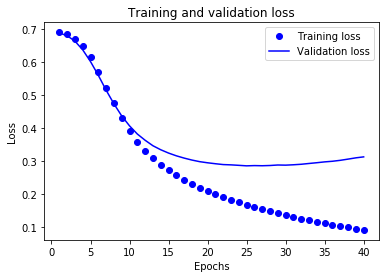

In [17]:
import matplotlib.pyplot as plt

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

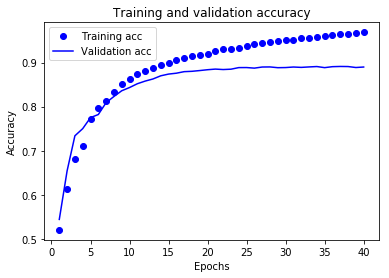

In [31]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()